<a href="https://colab.research.google.com/github/owenfab/IDS/blob/main/HW4/problem2_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IDS HW 4
##Owen Fabula
##Problem 2: Python

##Reading in data
First, I read the data in to a frame from the raw csv file on GitHub and imported relevant libraries as needed.

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as mpl

In [ ]:
#creating dataframe from raw csv
#get url of raw csv from GitHub and load csv content into data frame
nutr = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv", sep=",")
nutr

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


##Sorting by saturated_fat
To sort the dataset by the saturated_fat and get the top 5 food items by saturated fat, I used the following code:

In [ ]:
#sort values - see references
nutr.sort_values(by=['saturated_fat'],ascending=False).head(5)

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


From the above output, we can see that the top five foods in terms of saturated fat are: cheesecake, ice cream, yellowcake, creme pie, and lard (descending order).<br /><br />There is something to be said on the validity of sorting food items of different sizes: since some foods listed are simply larger than other foods, it follows that the larger foods will probably have more saturated fat than smaller food. It may benefit us, then, to sort values proportionate to the size of the food.

##Creating the saturated_fat_per_gram column
To create the saturated_fat_per_gram column, I divided each value in saturated_fat by its food's weight_in_grams. The following code does this:

In [ ]:
#create new col
nutr['saturated_fat_per_gram'] = nutr['saturated_fat']
#for each value in saturated_fat_per_gram, replace with saturated_fat / weight_in_grams
row = 0 #row index
for i in nutr['saturated_fat_per_gram']:
  nutr['saturated_fat_per_gram'][row] = nutr['saturated_fat'][row] / nutr['weight_in_grams'][row]
  row = row + 1
nutr['saturated_fat_per_gram']

0      0.000000
1      0.028219
2      0.000000
3      0.190476
4      0.191000
         ...   
956    0.000000
957    0.000000
958    0.000000
959    0.000000
960    0.000000
Name: saturated_fat_per_gram, Length: 961, dtype: float64

To produce a list of the top 5 highest foods by saturated fat per gram, I used the following code:

In [ ]:
#sort by new col
nutr.sort_values(by=['saturated_fat_per_gram'],ascending=False).head(5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


From the above output, we can see that there is actually a tie between 1 TBSP of salted and unsalted butter for the highest saturated fat per gram!

##Standardizing saturated_fat_per_gram
To standardize saturated_fat_per_gram , I first created a new column called scaled_satfatgram to store the standardized values; then, I calculated the mean and standard deviation of saturated_fat_per_gram and iterated through each value in saturated_fat_per_gram, found its z-score, and then added that value to scaled_satfatgram. The following code accomplishes this:

In [ ]:
#create scaled col
nutr['scaled_satfatgram'] = nutr['saturated_fat_per_gram']
#calculate mean and stdev for saturated_fat_per_gram
mean = nutr['saturated_fat_per_gram'].mean()
stdev = nutr['saturated_fat_per_gram'].std()
print(mean,"",stdev,"",max(nutr['saturated_fat_per_gram']))
#now iterate through each and calc z-score; add z-score to scaled_satfatgram
row = 0 #row index
for i in nutr['scaled_satfatgram']:
  nutr['scaled_satfatgram'][row] = ((nutr['saturated_fat_per_gram'][row] - mean) / stdev)
  row = row + 1

0.03716816572490468  0.06613051607882277  0.5071428571428571


0     -0.562043
1     -0.135330
2     -0.562043
3      2.318264
4      2.326185
         ...   
956   -0.562043
957   -0.562043
958   -0.562043
959   -0.562043
960   -0.562043
Name: scaled_satfatgram, Length: 961, dtype: float64

To produce a list of high-end outliers, I sorted scaled_satfatgram in descending order:

In [ ]:
#get only the values from scaled_satfatgram where z-score > 3
highEndOutliers = nutr[nutr.scaled_satfatgram > 3].sort_values(by=['scaled_satfatgram'],ascending=False)
highEndOutliers

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram,scaled_satfatgram,scaled_weight,scaled_cho
908,BUTTER; SALTED 1 TBSP,14.00,7.1,31,0.507143,7.106775,-0.769768,-0.012951
909,BUTTER; UNSALTED 1 TBSP,14.00,7.1,31,0.507143,7.106775,-0.769768,-0.012951
709,BUTTER; SALTED 1/2 CUP,113.00,57.1,247,0.505310,7.079055,-0.206978,1.787641
710,BUTTER; UNSALTED 1/2 CUP,113.00,57.1,247,0.505310,7.079055,-0.206978,1.787641
912,BUTTER; SALTED 1 PAT,5.00,2.5,11,0.500000,6.998763,-0.820931,-0.179672
913,BUTTER; UNSALTED 1 PAT,5.00,2.5,11,0.500000,6.998763,-0.820931,-0.179672
899,LARD 1 TBSP,13.00,5.1,12,0.392308,5.370282,-0.775453,-0.171336
890,LARD 1 CUP,205.00,80.4,195,0.392195,5.368580,0.316019,1.354165
920,IMITATION CREAMERS; POWDERED 1 TSP,2.00,0.7,0,0.350000,4.730522,-0.837985,-0.271369
210,CHOCOLATE; BITTER OT BAKING 1 OZ,28.35,9.0,0,0.317460,4.238469,-0.688192,-0.271369


From the above output, we can see that the highest end outliers are unsalted and salted butter, similar to the result of sorting saturated_fat_per_gram in descending order.<br /><br />To find the amount of values at the low end of the outliers, I used the following code:

In [ ]:
#find z-scores < -3
count = 0
for m in nutr['scaled_satfatgram']:
  if m < -3:
    count = count + 1
print("number of z-scores < -3:",count)

number of z-scores < -3: 0


From the above output, we can see that there are no outliers on the low end for saturated_fat_per_gram.<br /><br />To make a density plot for saturated_fat_per_gram, I used the follwing code:

<Axes: title={'center': 'saturated_fat_per_gram Density Plot'}, ylabel='Density'>

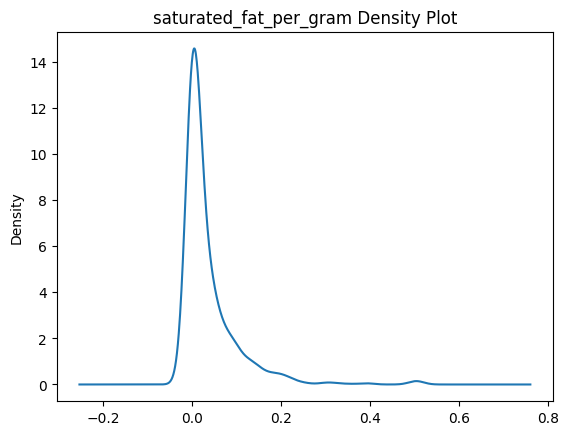

In [ ]:
#make density plot - see reference
nutr['saturated_fat_per_gram'].plot(kind='density',title='saturated_fat_per_gram Density Plot')

From the above output, we can see that there is a lot of density around the value 0, meaning that many foods in the original data set either have a very low or zero saturated fat per gram.

##Missing values
To find if there were any missing values, I used the following code:

In [ ]:
#find na
print("num NA values:",nutr.isna().values.sum())

#see if any other placeholders (missing vals)
count = 0
for i in nutr.columns:
  for j in nutr[i]:
    if j == '?' or j == 9999 or j == " ":
      count = count + 1
print("num placeholder values:",count)

num NA values: 0
num placeholder values: 0


According to the above output, there are no NA values (e.g., np.NaN, etc.) nor are there any obvious placeholder values in the entire data frame. I also took the liberty of visually inspecting the original data set and did not find anything that would indicate a missing value. As such, there is no need to impute any columns with any other values.

##Standardizing the rest of the numeric columns
To standardize the rest of the numeric columns (which includes weight_in_grams and cholesterol), I followed a similar procedure to what I did for saturated_fat_per_gram. I first made a new column for each other numeric column; then I found the mean and standard deviation for each original numeric column and iterated through each value in the original column and calculated its z-score, adding each value to the new scaled column. The following code achieves the above:

In [ ]:
#make new columns
nutr['scaled_weight'] = nutr['weight_in_grams']
nutr['scaled_cho'] = nutr['cholesterol']
#calc mean and stdev
weightMean = nutr['weight_in_grams'].mean()
weightStdev = nutr['weight_in_grams'].std()
choMean = nutr['cholesterol'].mean()
choStdev = nutr['cholesterol'].std()
#iterate through each and replace with z-score
row = 0 #row index
for i in nutr['scaled_weight']:
  nutr['scaled_weight'][row] = ((nutr['weight_in_grams'][row] - weightMean) / weightStdev)
  row = row + 1
#do same for cholesterol
row = 0 #row index again
for j in nutr['scaled_cho']:
  nutr['scaled_cho'][row] = ((nutr['cholesterol'][row] - choMean) / choStdev)
  row = row + 1
#print out scaled cols
print(nutr['scaled_weight'],"\n")
print(nutr['scaled_cho'])

0     -0.809561
1     -0.688192
2     -0.809561
3     -0.688192
4     -0.280880
         ...   
956    0.173900
957    0.514985
958    0.520669
959   -0.764083
960   -0.818088
Name: scaled_weight, Length: 961, dtype: float64 

0     -0.271369
1     -0.271369
2     -0.271369
3     -0.087975
4      0.387181
         ...   
956   -0.271369
957   -0.271369
958   -0.271369
959   -0.271369
960   -0.271369
Name: scaled_cho, Length: 961, dtype: float64


Now that the scaled columns had been made, I just needed to iterate through them and find out which z-scores were < -3 or > 3 (i.e., which were outliers). The folowing code does just that:

In [ ]:
count = 0 #count of outliers
#iterate through scaled_weight and check for outliers
for i in nutr['scaled_weight']:
  if i < -3 or i > 3:
    count = count + 1
print("num outliers in scaled_weight:",count)
count = 0 #reset count
#iterte through scaled_cho and check for outliers
for j in nutr['scaled_cho']:
  if j < -3 or j > 3:
    count = count + 1
print("num outliers in scaled_cho:",count)

num outliers in scaled_weight: 22
num outliers in scaled_cho: 17


From the above output, we can see that there are 22 outliers in scaled_weight and 17 outliers in scaled_cho. So, yes, there are indeed outliers in the other numeric columns.

##Summary of the above
<ul><li>First, sorting the original data set by saturated fat revealed that the 5 foods with the highest saturated fat are cheesecake, ice cream, yellowcake, creme pie, and lard.</li><li>Then, the saturated_fat_per_gram column was calculated and sorted; it was found that 1 TBSP of salted and unsalted butter were tied for the highest saturated fat per gram.</li><li>Then, saturated_fat_per_gram was standardized according to z-score:<ul><li>There were 15 values that were outliers on the high end.</li><li>There were 0 values that were outliers on the low end.</li></ul></li><li>A density plot was made of saturated_fat_per_gram, and from that, it wa concluded that many values in that column were 0 or numerically near 0.</li><li>It was then determined that there were no missing values in the original data set due to the lack of any sort of NA or null values as well as the absence of placeholder values.</li><li>Finally, the other two numeric columns were scaled according to z-score; here is what was discovered from that:<ul><li>First, weight_in_grams had 22 outliers.</li><li>Second, cholesterol had 17 outliers.</li></ul></li></ul>

##References
pandas sort_value: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html<br />.head(): https://stackoverflow.com/questions/16958499/sort-pandas-dataframe-and-print-highest-n-values<br />density plot: https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot